# Simple DNN Model
2020-04-19, John Rodriguez

A notebook for reading the new notebooks was done: 2020-04-08-JRO-ReadData. This one generates the dataset named **Xtohh300_dataset.csv**

##  Data Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv("../processed_data/Xtohh3000_dataset.csv")

In [3]:
dataset.head(5)

,sample,EventWeightNoXSec,EventWeight,EventNumber,m_region,m_FJNbtagJets,m_AntiBTag,m_AntiTauTag,m_FJpt,m_FJeta,...,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt,m_hhm_Coll,m_hhm_Eff,m_hhm_ConEff,m_hhm_ConVis,signal
0,fakes,-0.098973,-0.000892,3994248,QCDCR,1,3,2,614.65607,0.235415,...,2.887342,1.446572,431.10617,1296.25130,487.54608,-999.0,1852.8123,633.1675,1355.1530,0
1,fakes,-0.204399,-0.001842,4499931,SR,1,3,2,552.74560,0.379534,...,3.171939,-0.179417,146.01396,996.79333,138.95761,-999.0,1172.9274,823.8008,1061.2587,0
2,fakes,-0.131752,-0.001187,3470245,SR,0,3,2,506.22668,0.974346,...,3.197988,0.382356,196.94255,1062.96140,137.01768,-999.0,1283.1332,1168.3506,1376.2139,0
3,fakes,-0.131752,-0.001187,3470245,TwoDimMassWindow,0,3,2,506.22668,0.974346,...,3.197988,0.382356,196.94255,1062.96140,137.01768,-999.0,1283.1332,1168.3506,1376.2139,0
4,fakes,0.101267,0.000913,3325958,SR,1,2,2,496.98544,-0.908197,...,3.238636,-0.063105,226.39677,1006.51030,175.83073,-999.0,1256.6327,1098.9934,1151.8384,0


In [4]:
#moved to ada in 2020-04-28
def filter_region(df, region):
    """Filter dataframe by m_region"""
    return df[df["m_region"] == region]

def filter_tag(df, tag):
    """Filter dataframe by m_FJNbtagJets"""
    return df[df["m_FJNbtagJets"] == tag]

In [5]:
#filter by SR region and tag 1
SR1tag_data = filter_tag(filter_region(dataset, "SR"), 1)

In [6]:
weights = SR1tag_data["EventWeight"].values

In [7]:
#leave relevant columns
SR1tag_data = SR1tag_data[['m_FJpt', 'm_FJm', 'm_DTpt', 'm_DTm', 'm_dPhiFTwDT', 'm_dRFJwDT','m_dPhiDTwMET', 'm_MET', 'm_hhm', 'm_bbttpt', 'signal']]

In [8]:
SR1tag_data

,m_FJpt,m_FJm,m_DTpt,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt,signal
1,552.74560,55207.875,413.79214,110414.460,3.139348,3.171939,-0.179417,146.013960,996.79333,138.957610,0
4,496.98544,44013.460,335.85046,95668.800,2.969135,3.238636,-0.063105,226.396770,1006.51030,175.830730,0
11,561.23425,33809.203,458.77080,106337.375,2.811071,2.817163,-0.540567,138.885970,1019.93770,195.886890,0
19,1021.95917,250556.330,395.77725,85787.470,3.066202,3.169196,0.080569,593.462650,1415.37800,628.014040,0
20,483.88016,37648.703,697.62854,119724.760,3.052453,3.059698,-0.066707,102.990930,1178.68180,219.929290,0
...,...,...,...,...,...,...,...,...,...,...,...
93747,584.35100,152785.880,568.78520,78982.760,3.024037,3.165250,0.152210,20.557467,1301.18140,69.499115,0
93762,540.96936,175021.450,387.68744,56823.504,3.047778,3.300670,0.207881,98.683650,1130.15770,159.184950,0
93765,481.96080,137821.230,508.54764,76274.140,3.111821,3.114481,-0.269028,26.319555,1016.92080,30.398745,0
93787,578.04767,201581.600,451.40220,72284.840,3.004242,3.080201,-0.730236,21.346400,1113.91370,144.754620,0


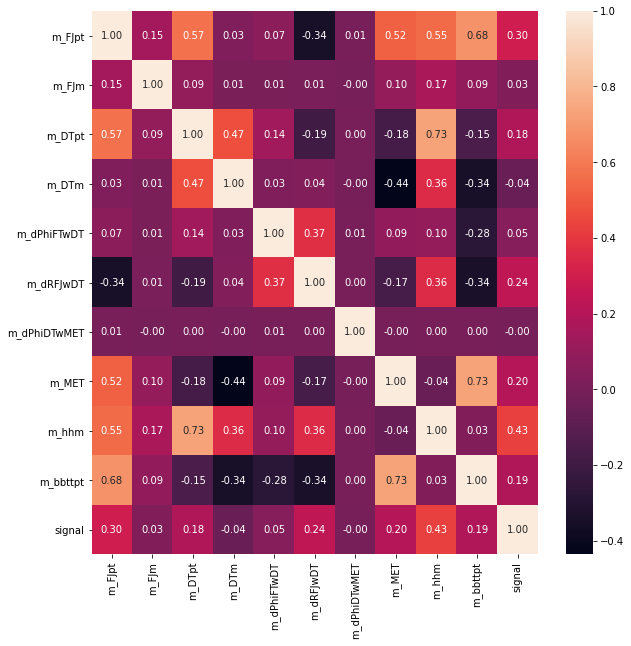

In [9]:
#confussion matrix
plt.figure(figsize=(10,10))
sns.heatmap(SR1tag_data.corr(), annot=True, fmt=".2f")
plt.show()

In [10]:
df_X = SR1tag_data.drop(columns = ["signal"])
df_y = SR1tag_data["signal"]
#check weighted mean

In [11]:
df_y.sum()/df_y.size

0.5226092270088604

In [12]:
def train_val_test_split(df_X, df_y, train_size, val_size, test_size, random_state = 1):
    if train_size + val_size + test_size != 1.0:
        print("Incorrect sizes!")
        return None
    
    X_tmp, X_test, y_tmp, y_test = train_test_split(df_X, df_y, test_size = test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size = val_size/(test_size + train_size), random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [13]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(df_X, df_y, .6, .2, .2)

In [14]:
train_size = X_train.size
test_size = X_test.size
val_size = X_val.size
total = train_size + test_size + val_size
print(train_size/total, val_size/total, test_size/total)

0.5999083409715857 0.20004582951420716 0.20004582951420716


## Training

In [15]:
def plot_train_val(A, B, n, xlabel, ylabel, title):
    plt.figure(1, figsize=(10, 6))
    plt.plot(range(n),A)
    plt.plot(range(n),B)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid(True)
    plt.legend(['Training', 'Validation'])
    plt.show()

In [16]:
scaler = StandardScaler().fit(X_train)

In [17]:
#All standarized
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val),columns=X_val.columns)
X_test_saled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

#y var's
y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [23]:
model_v1 = Sequential()

In [24]:
model_v1.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
model_v1.add(Dense(256, kernel_initializer='uniform',activation='relu'))
model_v1.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))

In [25]:
model_v1.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error', metrics=['accuracy'])

In [26]:
history_v1 = model_v1.fit(
    X_train_scaled.values,
    y_train,
    epochs = 20,
    verbose = 1,
    validation_data = (X_val_scaled.values, y_val)
)

Train on 7854 samples, validate on 2619 samples
Epoch 1/20
7854/7854 [==============================] - 0s 54us/step - loss: 0.2496 - accuracy: 0.5427 - val_loss: 0.2492 - val_accuracy: 0.5262
Epoch 2/20
7854/7854 [==============================] - 0s 47us/step - loss: 0.2485 - accuracy: 0.5519 - val_loss: 0.2481 - val_accuracy: 0.5368
Epoch 3/20
7854/7854 [==============================] - 0s 48us/step - loss: 0.2473 - accuracy: 0.5686 - val_loss: 0.2469 - val_accuracy: 0.6067
Epoch 4/20
7854/7854 [==============================] - 0s 48us/step - loss: 0.2459 - accuracy: 0.6455 - val_loss: 0.2453 - val_accuracy: 0.6754
Epoch 5/20
7854/7854 [==============================] - 0s 49us/step - loss: 0.2440 - accuracy: 0.7026 - val_loss: 0.2430 - val_accuracy: 0.7041
Epoch 6/20
7854/7854 [==============================] - 0s 50us/step - loss: 0.2413 - accuracy: 0.7186 - val_loss: 0.2397 - val_accuracy: 0.7190
Epoch 7/20
7854/7854 [==============================] - 0s 53us/step - loss: 0.237

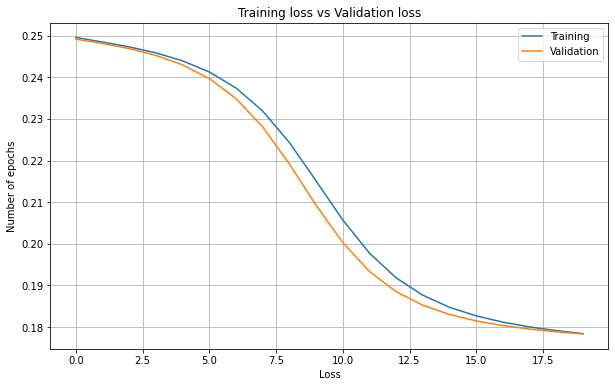

In [27]:
train_loss = history_v1.history['loss']
val_loss = history_v1.history['val_loss']
plot_train_val(train_loss, val_loss, 20, 'Loss', 'Number of epochs', 'Training loss vs Validation loss')

In [ ]:
#metrics -> confussion matrix
#overfitting analysis -> test Kolmogorov-smirnov -> compara distribuciones
#histogram -> score distribution alike in training and testing

## Prediction

In [ ]:
#coming soon
#define threshold for classifier
#https://www.itl.nist.gov/div898/handbook/eda/section3/eda35g.htm